# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響


In [9]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

SGD


In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4581 - accuracy: 0.4892 - val_loss: 1.7038 - val_accuracy: 0.4151
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4637 - accuracy: 0.4859 - val_loss: 1.7432 - val_accuracy: 0.3970
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.4197 - accuracy: 0.8491 - val_loss: 2.1269 - val_accuracy: 0.5290
Epoch 48/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.3753 - accuracy: 0.8663 - val_loss: 2.2393 - val_accuracy: 0.5167
Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.3836 - accuracy: 0.8622 - val_loss: 2.1886 - val_accuracy: 0.5359
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.3726 - accuracy: 0.8654 - val_loss: 2.2950 - val_accuracy: 0.5251
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.9343 - accuracy: 0.6739 - val_loss: 1.3334 - val_accuracy: 0.5406
Epoch 46/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9217 - accuracy: 0.6755 - val_loss: 1.3450 - val_accuracy: 0.5335
Epoch 47/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.9081 - accuracy: 0.6823 - val_loss: 1.4788 - val_accuracy: 0.5108
Epoch 48/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.8965 - accuracy: 0.6867 - val_loss: 1.4207 - val_accuracy: 0.5226
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.8882 - accuracy: 0.6865 - val_loss: 1.3772 - val_accuracy: 0.5367
Epoch 50/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.8704 - accuracy: 0.6964 - val_loss: 1.3585 - val_accuracy: 0.5406
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5819 - accuracy: 0.4485 - val_loss: 1.5945 - val_accuracy: 0.4385
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5770 - accuracy: 0.4501 - val_loss: 1.5912 - val_accuracy: 0.4410
Epoch 45/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5729 - accuracy: 0.4521 - val_loss: 1.5872 - val_accuracy: 0.4423
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5689 - accuracy: 0.4521 - val_loss: 1.5829 - val_accuracy: 0.4426
Epoch 47/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5638 - accuracy: 0.4548 - val_loss: 1.5796 - val_accuracy: 0.4434
Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5593 - accuracy: 0.4562 - val_loss: 1.5751 - val_accuracy: 0.4457
Epoch 49/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5553 - accuracy: 0.4577

Epoch 41/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9554 - accuracy: 0.3214 - val_loss: 1.9573 - val_accuracy: 0.3184
Epoch 42/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9512 - accuracy: 0.3218 - val_loss: 1.9531 - val_accuracy: 0.3221
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9470 - accuracy: 0.3230 - val_loss: 1.9491 - val_accuracy: 0.3238
Epoch 44/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9430 - accuracy: 0.3246 - val_loss: 1.9451 - val_accuracy: 0.3255
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9391 - accuracy: 0.3250 - val_loss: 1.9413 - val_accuracy: 0.3269
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9353 - accuracy: 0.3272 - val_loss: 1.9375 - val_accuracy: 0.3276
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9316 - accuracy: 0.3284

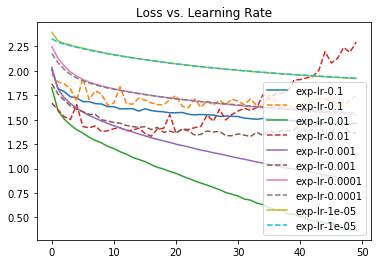

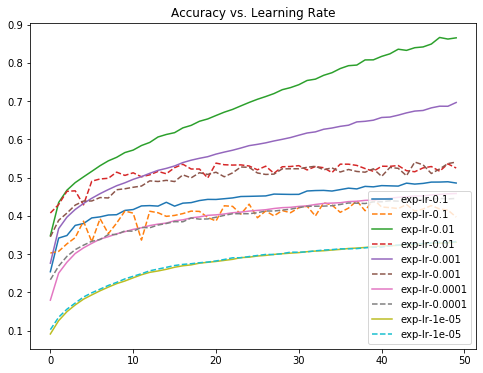

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

In [ ]:
RMSprop


In [25]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [26]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [27]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 13s 256us/step - loss: 0.7889 - accuracy: 0.7174 - val_loss: 2.0152 - val_accuracy: 0.4682
Epoch 49/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.7775 - accuracy: 0.7198 - val_loss: 1.9437 - val_accuracy: 0.4802
Epoch 50/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.7657 - accuracy: 0.7242 - val_loss: 2.0800 - val_accuracy: 0.4610
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 250us/step - loss: 0.8018 - accuracy: 0.7131 - val_loss: 1.9744 - val_accuracy: 0.4540
Epoch 46/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.7938 - accuracy: 0.7148 - val_loss: 1.9714 - val_accuracy: 0.4889
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.7807 - accuracy: 0.7186 - val_loss: 2.2047 - val_accuracy: 0.4591
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.7718 - accuracy: 0.7244 - val_loss: 2.0068 - val_accuracy: 0.4800
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.7592 - accuracy: 0.7277 - val_loss: 2.1183 - val_accuracy: 0.4975
Epoch 50/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.7443 - accuracy: 0.7316 - val_loss: 1.9777 - val_accuracy: 0.4879
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 10s 205us/step - loss: 0.8766 - accuracy: 0.6869 - val_loss: 1.8854 - val_accuracy: 0.4650
Epoch 43/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.8632 - accuracy: 0.6920 - val_loss: 1.8627 - val_accuracy: 0.4711
Epoch 44/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.8530 - accuracy: 0.6951 - val_loss: 1.9645 - val_accuracy: 0.4626
Epoch 45/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.8361 - accuracy: 0.7004 - val_loss: 1.9383 - val_accuracy: 0.4863
Epoch 46/50
50000/50000 [==============================] - 16s 319us/step - loss: 0.8291 - accuracy: 0.7030 - val_loss: 2.1239 - val_accuracy: 0.4419
Epoch 47/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8146 - accuracy: 0.7078 - val_loss: 1.9654 - val_accuracy: 0.4592
Epoch 48/50
50000/50000 [==============================] - 12s 234us/step - loss: 0.8127 - accuracy: 0.7103 - va

50000/50000 [==============================] - 10s 197us/step - loss: 0.9217 - accuracy: 0.6708 - val_loss: 1.7564 - val_accuracy: 0.4840
Epoch 40/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.9053 - accuracy: 0.6737 - val_loss: 1.8079 - val_accuracy: 0.4747
Epoch 41/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.8903 - accuracy: 0.6801 - val_loss: 1.7882 - val_accuracy: 0.4691
Epoch 42/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.8814 - accuracy: 0.6845 - val_loss: 1.7468 - val_accuracy: 0.4969
Epoch 43/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.8655 - accuracy: 0.6908 - val_loss: 1.7807 - val_accuracy: 0.4778
Epoch 44/50
50000/50000 [==============================] - 8s 150us/step - loss: 0.8586 - accuracy: 0.6942 - val_loss: 1.9001 - val_accuracy: 0.4579
Epoch 45/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.8439 - accuracy: 0.6949 - val_

Epoch 37/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9306 - accuracy: 0.6646 - val_loss: 1.6704 - val_accuracy: 0.4904
Epoch 38/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.9178 - accuracy: 0.6716 - val_loss: 1.8390 - val_accuracy: 0.4376
Epoch 39/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.8977 - accuracy: 0.6786 - val_loss: 1.9537 - val_accuracy: 0.4501
Epoch 40/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.8919 - accuracy: 0.6799 - val_loss: 1.8384 - val_accuracy: 0.4883
Epoch 41/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.8752 - accuracy: 0.6859 - val_loss: 1.8557 - val_accuracy: 0.4723
Epoch 42/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.8625 - accuracy: 0.6883 - val_loss: 1.7292 - val_accuracy: 0.4856
Epoch 43/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.8515 - accuracy: 0.6952

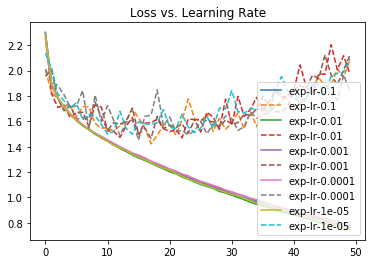

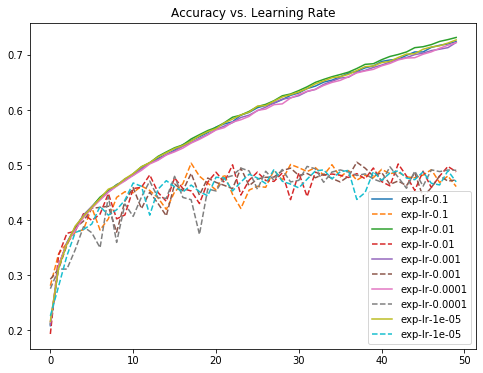

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

AdaGrad

In [30]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [34]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 10s 200us/step - loss: 1.0418 - accuracy: 0.6363 - val_loss: 1.3381 - val_accuracy: 0.5310
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.0359 - accuracy: 0.6378 - val_loss: 1.3844 - val_accuracy: 0.5184
Epoch 50/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.0288 - accuracy: 0.6419 - val_loss: 1.3698 - val_accuracy: 0.5215
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 10s 209us/step - loss: 1.1237 - accuracy: 0.6041 - val_loss: 1.3749 - val_accuracy: 0.5174
Epoch 46/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1169 - accuracy: 0.6057 - val_loss: 1.3756 - val_accuracy: 0.5174
Epoch 47/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.1124 - accuracy: 0.6061 - val_loss: 1.4115 - val_accuracy: 0.5064
Epoch 48/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.1033 - accuracy: 0.6105 - val_loss: 1.3702 - val_accuracy: 0.5194
Epoch 49/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1002 - accuracy: 0.6143 - val_loss: 1.4085 - val_accuracy: 0.5048
Epoch 50/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.0927 - accuracy: 0.6147 - val_loss: 1.3978 - val_accuracy: 0.5100
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
La

50000/50000 [==============================] - 11s 216us/step - loss: 1.1579 - accuracy: 0.5925 - val_loss: 1.4287 - val_accuracy: 0.5004
Epoch 43/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.1520 - accuracy: 0.5924 - val_loss: 1.4356 - val_accuracy: 0.5060
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.1471 - accuracy: 0.5960 - val_loss: 1.3688 - val_accuracy: 0.5188
Epoch 45/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.1384 - accuracy: 0.5998 - val_loss: 1.4251 - val_accuracy: 0.4941
Epoch 46/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.1345 - accuracy: 0.5995 - val_loss: 1.3737 - val_accuracy: 0.5216
Epoch 47/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.1272 - accuracy: 0.6030 - val_loss: 1.4412 - val_accuracy: 0.5013
Epoch 48/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.1198 - accuracy: 0.6043 - val_lo

Epoch 40/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.1162 - accuracy: 0.6076 - val_loss: 1.4416 - val_accuracy: 0.5087
Epoch 41/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1086 - accuracy: 0.6116 - val_loss: 1.3981 - val_accuracy: 0.5196
Epoch 42/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.0998 - accuracy: 0.6148 - val_loss: 1.4122 - val_accuracy: 0.5088
Epoch 43/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.0939 - accuracy: 0.6148 - val_loss: 1.3835 - val_accuracy: 0.5248
Epoch 44/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0877 - accuracy: 0.6193 - val_loss: 1.4166 - val_accuracy: 0.5128
Epoch 45/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.0787 - accuracy: 0.6226 - val_loss: 1.4599 - val_accuracy: 0.4971
Epoch 46/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0730 - accuracy: 0.6245

Epoch 38/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.1147 - accuracy: 0.6103 - val_loss: 1.3791 - val_accuracy: 0.5129
Epoch 39/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.1106 - accuracy: 0.6119 - val_loss: 1.4137 - val_accuracy: 0.5032
Epoch 40/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.1015 - accuracy: 0.6152 - val_loss: 1.4743 - val_accuracy: 0.4971
Epoch 41/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0940 - accuracy: 0.6177 - val_loss: 1.4374 - val_accuracy: 0.4929
Epoch 42/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0845 - accuracy: 0.6234 - val_loss: 1.6922 - val_accuracy: 0.4553
Epoch 43/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.0783 - accuracy: 0.6222 - val_loss: 1.3704 - val_accuracy: 0.5186
Epoch 44/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0688 - accuracy: 0.6277

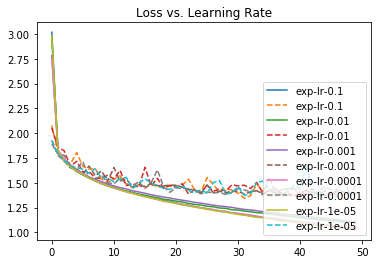

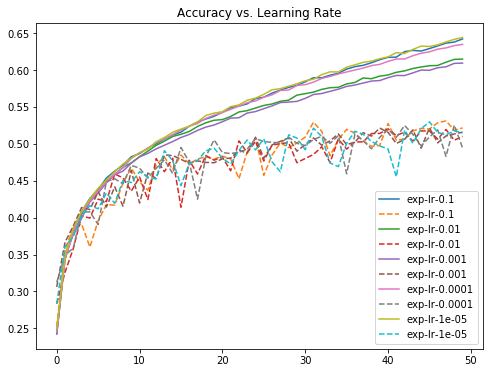

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

Adam


In [36]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [37]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [38]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 10s 197us/step - loss: 0.6487 - accuracy: 0.7678 - val_loss: 1.7740 - val_accuracy: 0.5160
Epoch 49/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.6306 - accuracy: 0.7748 - val_loss: 1.8220 - val_accuracy: 0.5134
Epoch 50/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.6227 - accuracy: 0.7774 - val_loss: 1.7927 - val_accuracy: 0.5246
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 6s 119us/step - loss: 0.7177 - accuracy: 0.7434 - val_loss: 1.6563 - val_accuracy: 0.5277
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.7029 - accuracy: 0.7481 - val_loss: 1.7064 - val_accuracy: 0.5193
Epoch 47/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.6821 - accuracy: 0.7566 - val_loss: 1.7598 - val_accuracy: 0.5129
Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.6734 - accuracy: 0.7588 - val_loss: 1.7627 - val_accuracy: 0.5188
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6681 - accuracy: 0.7601 - val_loss: 1.7539 - val_accuracy: 0.5249
Epoch 50/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6344 - accuracy: 0.7752 - val_loss: 1.7868 - val_accuracy: 0.5204
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer

Epoch 43/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.7149 - accuracy: 0.7429 - val_loss: 1.6645 - val_accuracy: 0.5149
Epoch 44/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.7148 - accuracy: 0.7458 - val_loss: 1.6379 - val_accuracy: 0.5234
Epoch 45/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7022 - accuracy: 0.7479 - val_loss: 1.6983 - val_accuracy: 0.5190
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6768 - accuracy: 0.7609 - val_loss: 1.7306 - val_accuracy: 0.5170
Epoch 47/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6730 - accuracy: 0.7597 - val_loss: 1.7083 - val_accuracy: 0.5133
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6481 - accuracy: 0.7675 - val_loss: 1.7992 - val_accuracy: 0.5126
Epoch 49/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.6481 - accuracy: 0.7682

Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7514 - accuracy: 0.7314 - val_loss: 1.6112 - val_accuracy: 0.5212
Epoch 42/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.7390 - accuracy: 0.7354 - val_loss: 1.6338 - val_accuracy: 0.5219
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7209 - accuracy: 0.7421 - val_loss: 1.6777 - val_accuracy: 0.5224
Epoch 44/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.7109 - accuracy: 0.7456 - val_loss: 1.6789 - val_accuracy: 0.5210
Epoch 45/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.7051 - accuracy: 0.7486 - val_loss: 1.6683 - val_accuracy: 0.5253
Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.6885 - accuracy: 0.7534 - val_loss: 1.7719 - val_accuracy: 0.5077
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.6698 - accuracy: 0.7588

Epoch 39/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.7943 - accuracy: 0.7178 - val_loss: 1.6132 - val_accuracy: 0.5127
Epoch 40/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.7839 - accuracy: 0.7222 - val_loss: 1.5729 - val_accuracy: 0.5203
Epoch 41/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7601 - accuracy: 0.7274 - val_loss: 1.5880 - val_accuracy: 0.5253
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.7457 - accuracy: 0.7353 - val_loss: 1.6292 - val_accuracy: 0.5244
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7363 - accuracy: 0.7379 - val_loss: 1.6241 - val_accuracy: 0.5166
Epoch 44/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.7221 - accuracy: 0.7436 - val_loss: 1.6681 - val_accuracy: 0.5208
Epoch 45/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.6961 - accuracy: 0.7539

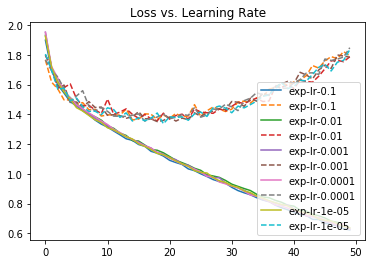

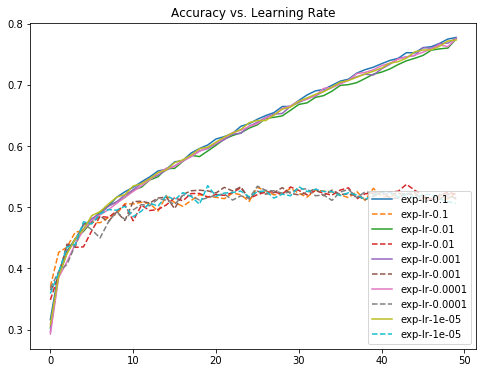

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()

由上述可知,泛化能力最佳模型為AdaGrad演算法,並能有效收斂模型殘差值.